In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import scikitplot as skplt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv("data.csv", header=None)

In [4]:
data.shape

(1085, 3121)

In [5]:
data.min().min()

-0.02843

In [6]:
data.max().max()

21994.6

In [7]:
a = data.isnull().sum()

In [8]:
data.isnull().sum().max()

751

In [9]:
cnt = 0
for i in a:
    if i==0:
        cnt+=1
print(cnt)

248


In [10]:
classes = data[3120]

In [11]:
classes[classes == 0 ].count()

709

In [12]:
classes[classes == 1 ].count()

376

In [13]:
data1 = data.fillna(data.mean())

In [14]:
X = data1.iloc[:,0:3119]

In [15]:
Y = data1[3120]

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(len(X_train), len(Y_train))
print(len(X_test), len(Y_test))

759 759
326 326


In [17]:
def preprocess1(x):
    scaler = MinMaxScaler()
    scaler.fit(x)
    x_scaled = scaler.transform(x)
    return x_scaled

In [18]:
def get_bayes_predictor(x, y):
    clf = MultinomialNB()
    clf.fit(x, y)
    return clf

In [19]:
X_train_p1 = preprocess1(X_train)
X_test_p1 = preprocess1(X_test)

In [20]:
predictor_p1 = get_bayes_predictor(X_train_p1, Y_train)

In [21]:
predictions_p1 = predictor_p1.predict(X_test_p1)

In [22]:
accuracy_p1 = accuracy_score(predictions_p1, Y_test)

In [23]:
print(accuracy_p1)

0.6809815950920245


In [24]:
score_p1 = predictor_p1.score(X_test_p1, Y_test)
print(score_p1)

0.6809815950920245


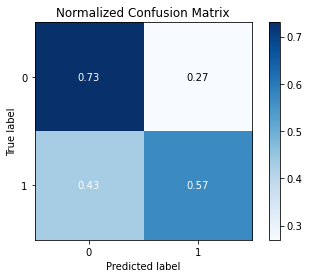

In [25]:
skplt.metrics.plot_confusion_matrix(Y_test, predictions_p1, normalize=True)

d:\users\hans tananda\.virtualenvs\compsci_361_ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


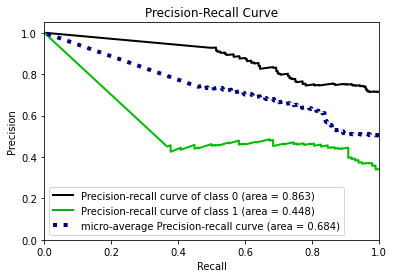

In [26]:
skplt.metrics.plot_precision_recall_curve(Y_test, predictor_p1.predict_proba(X_test_p1))
plt.show()

In [27]:
print(accuracy_p1)

0.6809815950920245


In [28]:
score_p1 = predictor_p1.score(X_test_p1, Y_test)
print(score_p1)

0.6809815950920245


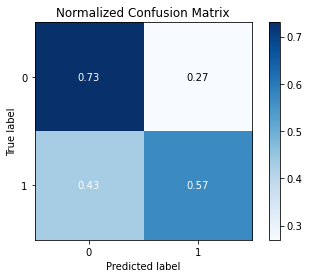

In [29]:
skplt.metrics.plot_confusion_matrix(Y_test, predictions_p1, normalize=True)

d:\users\hans tananda\.virtualenvs\compsci_361_ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


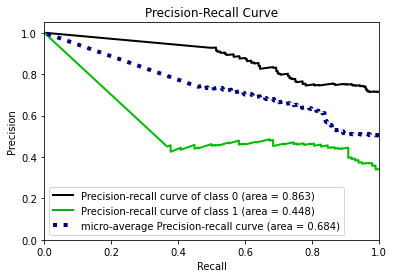

In [30]:
skplt.metrics.plot_precision_recall_curve(Y_test, predictor_p1.predict_proba(X_test_p1))
plt.show()